In [1]:
%matplotlib inline
import pandas as pd
import nltk
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import re
import matplotlib.pyplot as plt

In [2]:
# Import tweets from csv
raw_data = pd.read_csv('./ML Challenge/tweets.csv', delimiter=';')

In [6]:
raw_data.head()

,id,polarity,tweet
0,1467933112,0,the angel is going to miss the athlete this we...
1,2323395086,0,It looks as though Shaq is getting traded to C...
2,1467968979,0,@clarianne APRIL 9TH ISN'T COMING SOON ENOUGH
3,1990283756,0,drinking a McDonalds coffee and not understand...
4,1988884918,0,So dissapointed Taylor Swift doesnt have a Twi...


In [8]:
# count the number of negative(0) and positive(4) tweets
raw_data.polarity.value_counts()

0    1402
4     632
Name: polarity, dtype: int64

In [16]:
pos_tweets = raw_data[raw_data['polarity'] == 4]

In [17]:
neg_tweets = raw_data[raw_data['polarity'] == 0]

In [21]:
pos_wordlist = pd.DataFrame(pos_tweets.tweet.str.lower().str.split().tolist()).stack()

In [31]:
pos_wordlist.value_counts()[0:10]

to     260
i      257
the    253
and    171
a      163
you    135
in     122
for    115
my     113
on      98
dtype: int64

In [26]:
pos_text = " ".join(pos_wordlist.str.lower())

In [29]:
pos_filter = " ".join([word for word in pos_text.split()\
                       if not word.startswith('@')\
                       and word not in STOPWORDS])

In [38]:
pd.DataFrame(pos_filter.split())[0].value_counts()[0:100]

love         72
good         50
new          42
taylor       41
day          35
see          34
going        33
go           32
great        31
&amp;        30
got          29
swift        26
-            25
lakers       24
now          24
time         23
today        22
nice         20
think        20
back         20
will         19
thanks       19
wait         19
know         19
starbucks    19
night        18
really       18
mcdonalds    17
lol          17
happy        16
             ..
looking       9
n             9
please        9
oprah         9
even          9
ipod          9
always        9
videos        8
wish          8
hope          8
meet          8
big           8
music         8
game          8
home          8
follow        8
guys          8
glad          8
soon          7
tell          7
songs         7
you.          7
;)            7
take          7
makes         7
hey           7
another       7
better        7
cant          7
iphone        7
Name: 0, dtype: int64

In [50]:
pos_nopunc = " ".join([re.sub('[\(\)!.,;-]', '', word) for word in pos_text.split()\
                       if not word.startswith('@')\
                       and word not in STOPWORDS])

In [51]:
pd.DataFrame(pos_nopunc.split())[0].value_counts()[0:100]

love         73
good         61
day          46
taylor       42
new          42
lakers       37
now          36
go           36
great        36
see          35
swift        34
going        33
&amp         30
got          29
today        29
night        27
nice         27
time         26
lol          26
thanks       25
haha         23
awesome      23
wait         23
seattle      23
back         22
england      22
know         22
youtube      22
happy        21
think        21
             ..
next         11
facebook     11
game         11
pretty       11
fun          11
way          11
beautiful    11
always       11
iphone       10
finals       10
year         10
show         10
guys         10
win          10
yay          10
saw          10
want         10
please       10
too          10
excited      10
home          9
looking       9
even          9
songs         9
n             9
magic         9
follow        9
girl          8
better        8
big           8
Name: 0, dtype: int64

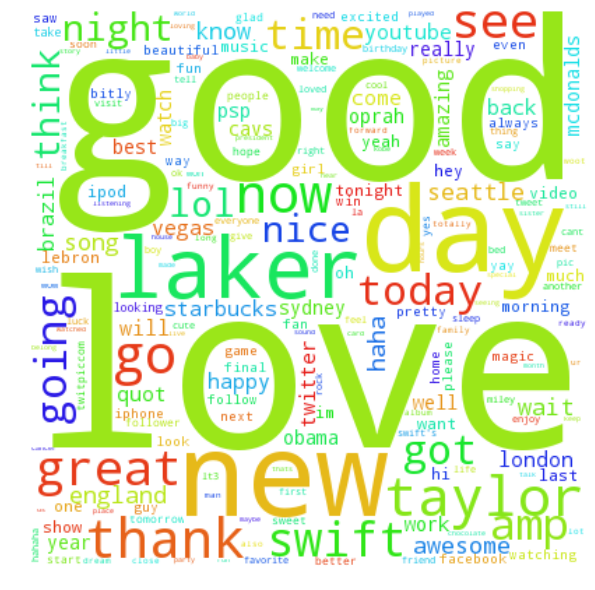

In [61]:
pos_wc = WordCloud(background_color="white", height=400)
pos_wc.generate(pos_nopunc)
plt.figure(figsize=(10,10))
plt.imshow(pos_wc)
plt.axis("off")
plt.show()

In [39]:
neg_wordlist = pd.DataFrame(neg_tweets.tweet.str.lower().str.split().tolist()).stack()

In [40]:
neg_text = " ".join(neg_wordlist.str.lower())

In [41]:
neg_filter = " ".join([word for word in neg_text.split()\
                       if not word.startswith('@')\
                       and word not in STOPWORDS])

In [42]:
pd.DataFrame(neg_filter.split())[0].value_counts()[0:100]

got         72
sad         68
go          66
going       66
now         65
cancer      57
miss        56
headache    55
work        53
iphone      52
xbox        51
want        50
im          49
really      48
fever       47
back        45
still       44
cavs        44
one         41
ipod        41
wish        40
-           40
need        38
will        37
&amp;       36
live        36
damn        36
feel        35
think       35
day         34
            ..
right       22
seattle     21
wanna       21
next        21
lol         21
play        21
old         20
find        20
swift       20
well        20
away        19
feeling     19
people      19
lakers      19
night       18
guess       18
left        17
dont        17
never       17
year        17
poor        17
3           17
days        16
long        16
let         16
getting     16
us          16
watch       16
please      16
sleep       15
Name: 0, dtype: int64

In [52]:
neg_nopunc = " ".join([re.sub('[\(\)!.,;-]', '', word) for word in neg_text.split()\
                       if not word.startswith('@')\
                       and word not in STOPWORDS])

In [53]:
pd.DataFrame(neg_nopunc.split())[0].value_counts()[0:100]

headache     84
sad          79
now          78
go           74
got          74
cancer       70
going        67
work         65
iphone       61
fever        61
miss         56
today        55
xbox         53
want         53
back         51
im           50
cavs         50
really       50
mcdonalds    48
ipod         45
still        44
home         44
one          44
day          42
wish         41
live         41
lost         40
facebook     39
damn         38
sydney       38
             ..
people       25
gonna        25
new          25
come         25
lakers       24
right        24
even         23
it           23
bed          22
play         22
morning      22
old          21
next         21
sleep        21
wanna        21
though       21
long         20
tomorrow     20
find         20
tired        20
away         20
guess        19
left         19
feeling      19
year         19
days         18
sucks        18
us           18
tonight      18
never        17
Name: 0, dtype: int64

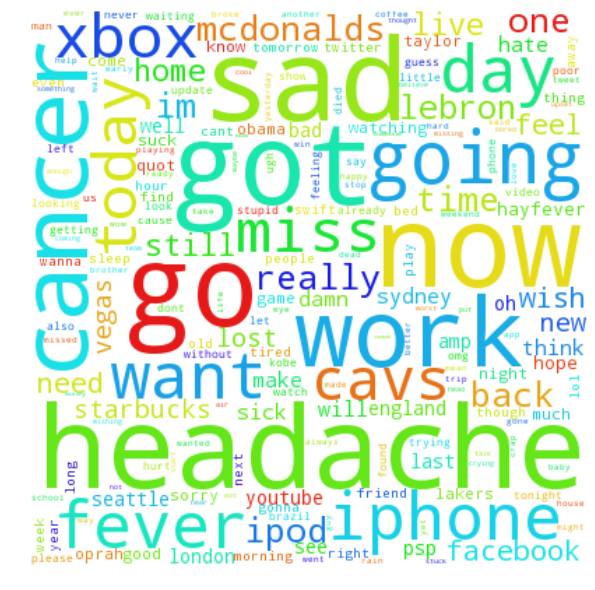

In [62]:
neg_wc = WordCloud(background_color="white", height=400)
neg_wc.generate(neg_nopunc)
plt.figure(figsize=(10,10))
plt.imshow(neg_wc)
plt.axis("off")
plt.show()

In [3]:
tweets_noid = raw_data[['tweet','polarity']]

In [4]:
tweets_noid.head()

,tweet,polarity
0,the angel is going to miss the athlete this we...,0
1,It looks as though Shaq is getting traded to C...,0
2,@clarianne APRIL 9TH ISN'T COMING SOON ENOUGH,0
3,drinking a McDonalds coffee and not understand...,0
4,So dissapointed Taylor Swift doesnt have a Twi...,0


In [5]:
# Using example at http://www.laurentluce.com/posts/twitter-sentiment-analysis-using-python-and-nltk/
tuple_list = [tuple(x) for x in tweets_noid.values]
tweet_training = []
for (words, sentiment) in tuple_list:
    rem_punc = re.sub('[!.,;@#]', '', words)
    words_filtered = [e.lower() for e in rem_punc.split() if len(e) >= 2]
    tweet_training.append((words_filtered, sentiment))

In [6]:
tweet_training[3]

(['drinking',
  'mcdonalds',
  'coffee',
  'and',
  'not',
  'understanding',
  'why',
  'someone',
  'would',
  'hurt',
  'me',
  'for',
  'no',
  'apparent',
  'reason'],
 0L)

In [7]:
def get_words_in_tweets(tweets):
    all_words = []
    for (words, sentiment) in tweets:
        all_words.extend(words)
    return all_words

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    word_features = wordlist.keys()
    return word_features, wordlist

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

word_features, wordlist = get_word_features(get_words_in_tweets(tweet_training))

In [8]:
training_set = nltk.classify.apply_features(extract_features, tweet_training)

In [9]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [45]:
classifier.show_most_informative_features(200)

Most Informative Features
       contains(awesome) = True                4 : 0      =     34.7 : 1.0
          contains(song) = True                4 : 0      =     18.5 : 1.0
            contains(no) = True                0 : 4      =     18.0 : 1.0
     contains(beautiful) = True                4 : 0      =     15.5 : 1.0
          contains(glad) = True                4 : 0      =     12.6 : 1.0
          contains(love) = True                4 : 0      =     12.1 : 1.0
       contains(amazing) = True                4 : 0      =     11.1 : 1.0
         contains(loved) = True                4 : 0      =     11.1 : 1.0
        contains(hahaha) = True                4 : 0      =     11.1 : 1.0
          contains(damn) = True                0 : 4      =     11.0 : 1.0
          contains(sick) = True                0 : 4      =     10.1 : 1.0
         contains(funny) = True                4 : 0      =      9.6 : 1.0
          contains(rock) = True                4 : 0      =      9.6 : 1.0

In [62]:
len(classifier._feature_probdist)

12108

In [75]:
# modified from http://stackoverflow.com/questions/16410661/how-to-write-features-in-nltk-to-a-txt-file
def show_most_informative_features(self, sentiment, n=10):
    strlist = []
    # Determine the most relevant features, and display them.
    cpdist = self._feature_probdist
    # print('Most Informative Features')
    #strlist.append('Most Informative Features')
    count = 0
    for (fname, fval) in self.most_informative_features(1000):
            def labelprob(l):
                return cpdist[l,fname].prob(fval)
            labels = sorted([l for l in self._labels\
                     if fval in cpdist[l,fname].samples()],\
                    key=labelprob)
            if len(labels) == 1: continue
            l0 = labels[0]
            l1 = labels[-1]
            #while count < n:
            if l1 == sentiment:
                if cpdist[l0,fname].prob(fval) == 0:
                    ratio = 'INF'
                else:
                    ratio = '%8.1f' % (cpdist[l1,fname].prob(fval) /
                          cpdist[l0,fname].prob(fval))
            # print(('%24s = %-14r %6s : %-6s = %s : 1.0' %
            #      (fname, fval, ("%s" % l1)[:6], ("%s" % l0)[:6], ratio)))
                strlist.append(('%24s = %-14r %6s : %-6s = %s : 1.0' %
                        (fname, fval, ("%s" % l1)[:6], ("%s" % l0)[:6], ratio)))
            #count += 1
    return strlist[:n]

In [78]:
vals_as_list = show_most_informative_features(classifier, 4, 100)

In [80]:
vals_as_list

['       contains(awesome) = True                4 : 0      =     34.7 : 1.0',
 '          contains(song) = True                4 : 0      =     18.5 : 1.0',
 '     contains(beautiful) = True                4 : 0      =     15.5 : 1.0',
 '          contains(glad) = True                4 : 0      =     12.6 : 1.0',
 '          contains(love) = True                4 : 0      =     12.1 : 1.0',
 '       contains(amazing) = True                4 : 0      =     11.1 : 1.0',
 '         contains(loved) = True                4 : 0      =     11.1 : 1.0',
 '        contains(hahaha) = True                4 : 0      =     11.1 : 1.0',
 '         contains(funny) = True                4 : 0      =      9.6 : 1.0',
 '          contains(rock) = True                4 : 0      =      9.6 : 1.0',
 '          contains(haha) = True                4 : 0      =      9.5 : 1.0',
 '        contains(follow) = True                4 : 0      =      8.4 : 1.0',
 '        contains(belong) = True                4 :

In [81]:
vals_as_list = show_most_informative_features(classifier, 0, 100)

In [83]:
vals_as_list

['            contains(no) = True                0 : 4      =     18.0 : 1.0',
 '          contains(damn) = True                0 : 4      =     11.0 : 1.0',
 '          contains(sick) = True                0 : 4      =     10.1 : 1.0',
 '          contains(miss) = True                0 : 4      =      7.2 : 1.0',
 '          contains(lost) = True                0 : 4      =      7.1 : 1.0',
 '          contains(play) = True                0 : 4      =      6.8 : 1.0',
 '         contains(wanna) = True                0 : 4      =      6.5 : 1.0',
 '           contains(bad) = True                0 : 4      =      6.4 : 1.0',
 '          contains(been) = True                0 : 4      =      6.2 : 1.0',
 '          contains(left) = True                0 : 4      =      5.9 : 1.0',
 '        contains(cancer) = True                0 : 4      =      5.6 : 1.0',
 '          contains(xbox) = True                0 : 4      =      5.6 : 1.0',
 '         contains(sorry) = True                0 :